In [95]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


In [355]:
dl_data=pd.read_csv("nitrc_download_report_20160304.csv",sep=",",quotechar='"',header=0,index_col=False)
dl_data['Date']=pd.to_datetime(dl_data['Date'],format="%Y%m%d")
dl_counts=dl_data.groupby(['Date']).size()
dl_counts=dl_counts.resample('M',how='sum')
dl_counts.to_csv("download_counts.csv")

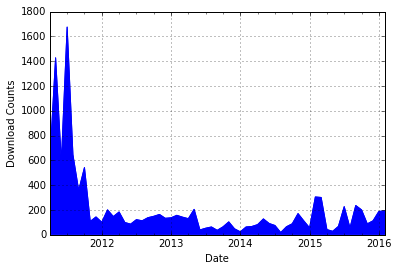

In [305]:
count_plot=dl_counts.plot(kind="area",xlim=(pd.Timestamp('2011-04-30'),pd.Timestamp('2016-02-29')))
#row[0]=dt.datetime.strptime(row[0],"%Y%m%d")
plt.ylabel("Download Counts")

In [331]:
fig=count_plot.get_figure()
fig.savefig("count_plot.pdf")
fig.savefig("count_plot.png")

In [339]:
import bibtexparser as bp
with open('adhd200_pubs.bib') as bibtex_file:
    bibtex_str = bibtex_file.read()

bib_database = bp.loads(bibtex_str)

documents=[]

for entry in bib_database.entries:
    doc_year = pd.to_datetime(entry['year'])
    if 'phdthesis' in entry['ENTRYTYPE']:
        if 'master' in entry['type'].lower():
            doc_type = 'Master\'s Thesis'
        else:
            doc_type = 'PhD Dissertation'
    elif 'inproceedings' in entry['ENTRYTYPE']:
        doc_type = 'In Proceedings'
    elif 'article' in entry['ENTRYTYPE']:
        if 'keyword' in entry.keys() and 'arxiv' in entry['keyword']:
            doc_type = 'arXiv E-print'
        else:
            doc_type = 'Journal'
    else:
        doc_type = 'Patent'
    
    if 'mendeley-tags' in entry:
        documents.append((entry['year'],doc_type,entry['mendeley-tags']))
    else:
        print entry['ENTRYTYPE'], entry['ID']
        
documents_df = pd.DataFrame(documents,columns=('Year','Type','Subject'))

In [353]:
document_counts=documents_df.groupby(['Year','Type']).size().unstack().fillna(0)
document_counts.to_csv('document_counts.csv')

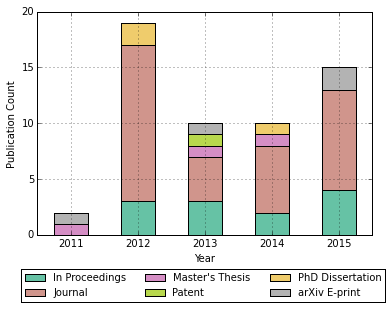

In [343]:
plt_ax=document_counts.plot(kind='bar', stacked=True, legend=False, use_index=True,colormap='Set2',rot=0);
plt_ax.legend(loc=(-0.05,-0.3), ncol=3, fontsize="medium")
plt.ylabel('Publication Count')

print document_counts

In [354]:
subject_counts=documents_df.groupby(['Subject']).size().fillna(0)
subject_counts.to_csv('subject_counts.csv')